<a href="https://colab.research.google.com/github/ChowMeins/Pokemon-CNN/blob/main/Pokemon_Encounter_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

# URL of the image
url = "https://www.spriters-resource.com/media/assets/17/18502.png?updated=1755472519"

# Send a GET request to fetch the image
response = requests.get(url)

# Make sure the request was successful
if response.status_code == 200:
    # Open a file in binary write mode and save the content
    with open("pokemon_pt_battle_backgrounds.png", "wb") as f:
        f.write(response.content)
    print("Image downloaded successfully!")
else:
    print(f"Failed to download image. Status code: {response.status_code}")

Image downloaded successfully!


In [72]:
# Left side - Field backgrounds
field_names = [
    "field_day", "field_afternoon", "field_night",
    "surf_day", "surf_afternoon", "surf_night",
    "city_day", "city_afternoon", "city_night",
    "forest_day", "forest_afternoon", "forest_night",
    "rocky_day", "rocky_afternoon", "rocky_night",
    "snow_day", "snow_afternoon", "snow_night",
    "indoor_1", "indoor_2", "indoor_3",
    "cave_1", "cave_2", "cave_3",
    "aaron", "bertha", "flint",
    "lucian", "cynthia", "distortion_world",
    "battle_tower", "battle_factory", "battle_arcade",
    "battle_castle", "battle_hall"
]

# Right side - Battle spot platforms
battle_spot_names = [
    "grass_day", "grass_afternoon", "grass_night",
    "water_day", "water_afternoon", "water_night",
    "path_day", "path_afternoon", "path_night",
    "ice_day", "ice_afternoon", "ice_night",
    "rocky_day", "rocky_afternoon", "rocky_night",
    "snow_day", "snow_afternoon", "snow_night",
    "sand_day", "sand_afternoon", "sand_night",
    "mud_day", "mud_afternoon", "mud_night",
    "wet_path_day", "wet_path_afternoon", "wet_path_night",
    "cave", "indoor", "aaron",
    "bertha", "flint", "lucian",
    "cynthia", "distortion_world", "battle_tower",
    "battle_factory", "battle_arcade", "battle_castle",
    "battle_hall"
]

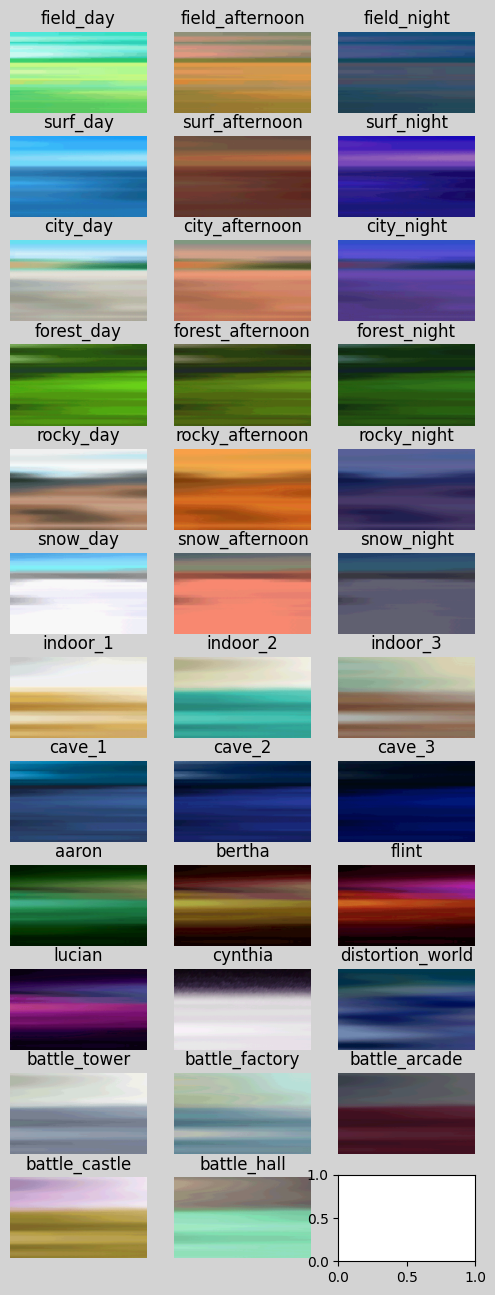

In [89]:
from PIL import Image, ImageFile
import matplotlib.axes
import matplotlib.pyplot as plt
import math

def process(filename: str, img: ImageFile, axes: matplotlib.axes.Axes, index: int, x1: int, y1: int, x2: int, y2: int) -> None:
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = Image.open(filename)
    # <something gets done here>
    r, c = i // 3, i % 3
    axes = axes[r, c]
    axes.title.set_text(field_names[index])
    axes.imshow(image.crop((x1, y1, x2, y2)))
    axes.axis("off")

NUM_BACKGROUNDS = 35
file_path = "pokemon_pt_battle_backgrounds.png"
crops = []
nrows, ncols = math.ceil(NUM_BACKGROUNDS / 3), 3
fig, axes = plt.subplots(nrows, ncols, figsize=(6, 16))
fig.set_facecolor("lightgray")
img = Image.open(file_path)

for i in range(35):
  row, col = i // 3, i % 3
  x1, y1 = 0, 16
  x2, y2 = 256, 168
  new_x1, new_y1 = x1 + 256 * col, y1 + 168 * row
  new_x2, new_y2 = x2 + 256 * col, y2 + 168 * row
  process(file_path, img, axes, i, new_x1, new_y1, new_x2, new_y2)
  crops.append({
      "image_name": field_names[i],
      "crop": {"x1": new_x1, "y1": new_y1, "x2": new_x2, "y2": new_y2}
  })

import json

# Save to crops.json
with open("crops.json", "w") as f:
    json.dump(crops, f, indent=4)  # indent=4 makes it human-readable

